In [13]:
import pandas as pd #DataFrame, Series
import numpy as np 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import io
import scipy.misc
import imageio

%matplotlib inline

## Spotify Song Attributes EDA


(i) EDA to visulaize data and observe structures 

(ii) Train a decision tree classifier

Goal: Predict target using the trained classifier in  order to see if a user like/dislike a particular song

In [14]:
data = pd.read_csv("/Users/bhavay/Desktop/CU Boulder/SEM 2/Machine learning/project/spotify_likeordislike.csv")

In [15]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [16]:
data.shape

(2017, 17)

In [17]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [19]:
train, test = train_test_split(data, test_size = 0.25)

In [20]:
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 1512; Test size: 505


In [21]:
# Custom Color Palette
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [22]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']


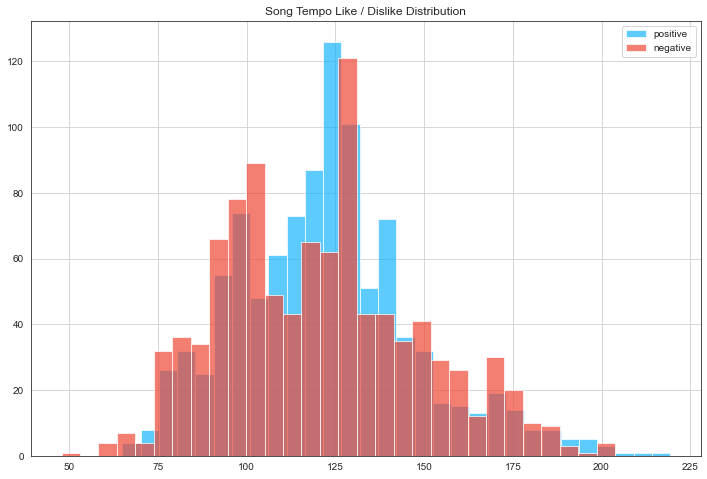

In [23]:
fig = plt.figure(figsize=(12,8))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label= 'positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label= 'negative')
plt.legend(loc = 'upper right')

/var/folders/0v/jwfk5rf54j31r251dzgfvvsh0000gn/T/ipykernel_8438/2888484979.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(331)
/var/folders/0v/jwfk5rf54j31r251dzgfvvsh0000gn/T/ipykernel_8438/2888484979.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax6 = fig2.add_subplot(332)
/var/folders/0v/jwfk5rf54j31r251dzgfvvsh0000gn/T/ipykernel_8438/2888484979.py:30: MatplotlibDeprecationWarning: Adding a

<AxesSubplot:title={'center':'Song Instrumentalness Like Distribution'}, xlabel='Loudness', ylabel='Count'>

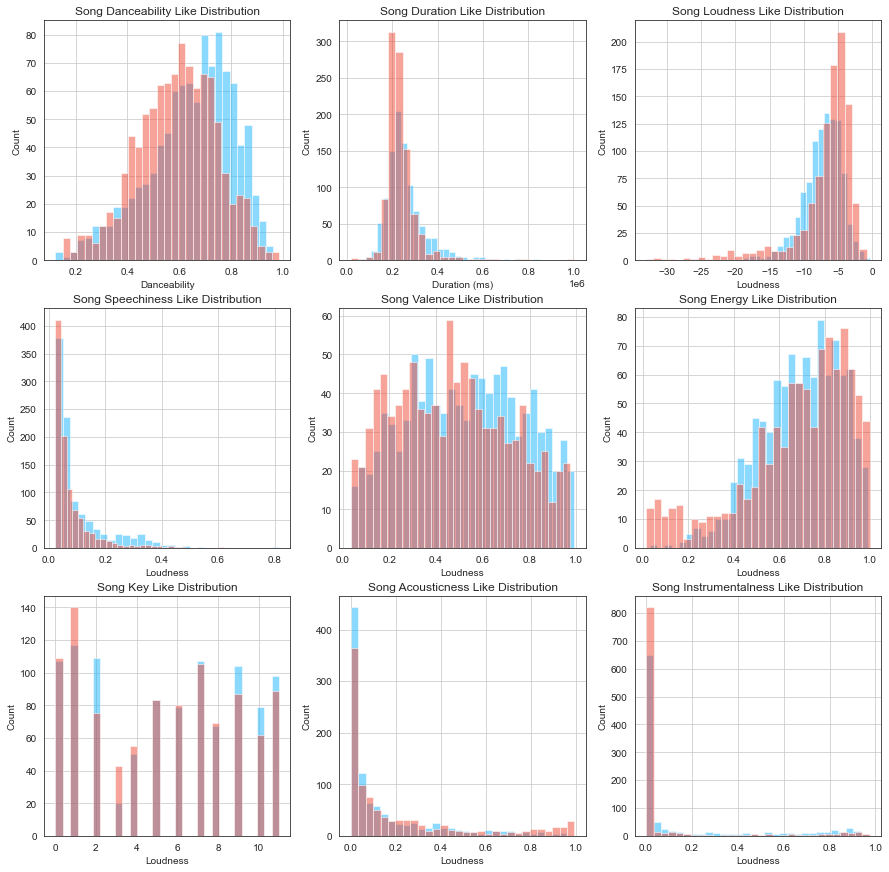

In [24]:
fig2 = plt.figure(figsize=(15,15))

#Danceability

ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha= 0.5, bins= 30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha= 0.5, bins= 30)

#Duration

ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')
pos_duration.hist(alpha= 0.5, bins= 30)
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha= 0.5, bins= 30)

#Loudness

ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like Distribution')
pos_loudness.hist(alpha= 0.5, bins= 30)
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha= 0.5, bins= 30)

#Speechiness

ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Loudness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like Distribution')
pos_speechiness.hist(alpha= 0.5, bins= 30)
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha= 0.5, bins= 30)

#Valence

ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Loudness')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like Distribution')
pos_valence.hist(alpha= 0.5, bins= 30)
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha= 0.5, bins= 30)

#Energy

ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Loudness')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha= 0.5, bins= 30)
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha= 0.5, bins= 30)

#Key

ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Loudness')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Like Distribution')
pos_key.hist(alpha= 0.5, bins= 30)
ax16 = fig2.add_subplot(337)
neg_key.hist(alpha= 0.5, bins= 30)

#Acousticness

ax17 = fig2.add_subplot(338)
ax17.set_xlabel('Loudness')
ax17.set_ylabel('Count')
ax17.set_title('Song Acousticness Like Distribution')
pos_acousticness.hist(alpha= 0.5, bins= 30)
ax18 = fig2.add_subplot(338)
neg_acousticness.hist(alpha= 0.5, bins= 30)


#Instrumentalness

ax19 = fig2.add_subplot(339)
ax19.set_xlabel('Loudness')
ax19.set_ylabel('Count')
ax19.set_title('Song Instrumentalness Like Distribution')
pos_instrumentalness.hist(alpha= 0.5, bins= 30)
ax20 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha= 0.5, bins= 30)

In [25]:
c = DecisionTreeClassifier(min_samples_split=100)

In [26]:
features = ["danceability", "duration_ms", "loudness", "speechiness", "valence", "energy", "key", "acousticness", "instrumentalness"]

In [27]:
#training set
x_train = train[features] 
y_train = train["target"]

#test set
x_test = test[features] 
y_test = test["target"]

In [28]:
x_train

,danceability,duration_ms,loudness,speechiness,valence,energy,key,acousticness,instrumentalness
213,0.602,215518,-4.897,0.0435,0.468,0.764,10,0.002700,0.005300
1301,0.226,209563,-9.169,0.0546,0.323,0.553,1,0.000008,0.037900
218,0.583,202710,-7.416,0.4090,0.422,0.843,1,0.119000,0.000000
383,0.758,216234,-9.044,0.0402,0.218,0.343,1,0.775000,0.000000
1076,0.529,215600,-5.379,0.0389,0.343,0.803,7,0.200000,0.000000
...,...,...,...,...,...,...,...,...,...
1965,0.423,322933,-5.374,0.0812,0.298,0.655,2,0.677000,0.000000
369,0.814,234640,-5.766,0.0822,0.287,0.830,10,0.015200,0.360000
119,0.746,222093,-3.803,0.1280,0.808,0.873,7,0.024400,0.000000
198,0.558,301573,-6.220,0.0448,0.214,0.740,6,0.001920,0.000009


In [29]:
y_train

213     1
1301    0
218     1
383     1
1076    0
       ..
1965    0
369     1
119     1
198     1
262     1
Name: target, Length: 1512, dtype: int64

In [30]:
#training the decision tree classifier

dt = c.fit(x_train,y_train)

In [36]:
from sklearn.tree import plot_tree

def show_tree(tree, features):
    plt.figure(figsize=(20, 20))
    plot_tree(tree, feature_names=features, filled=True, fontsize=10)
    plt.show()

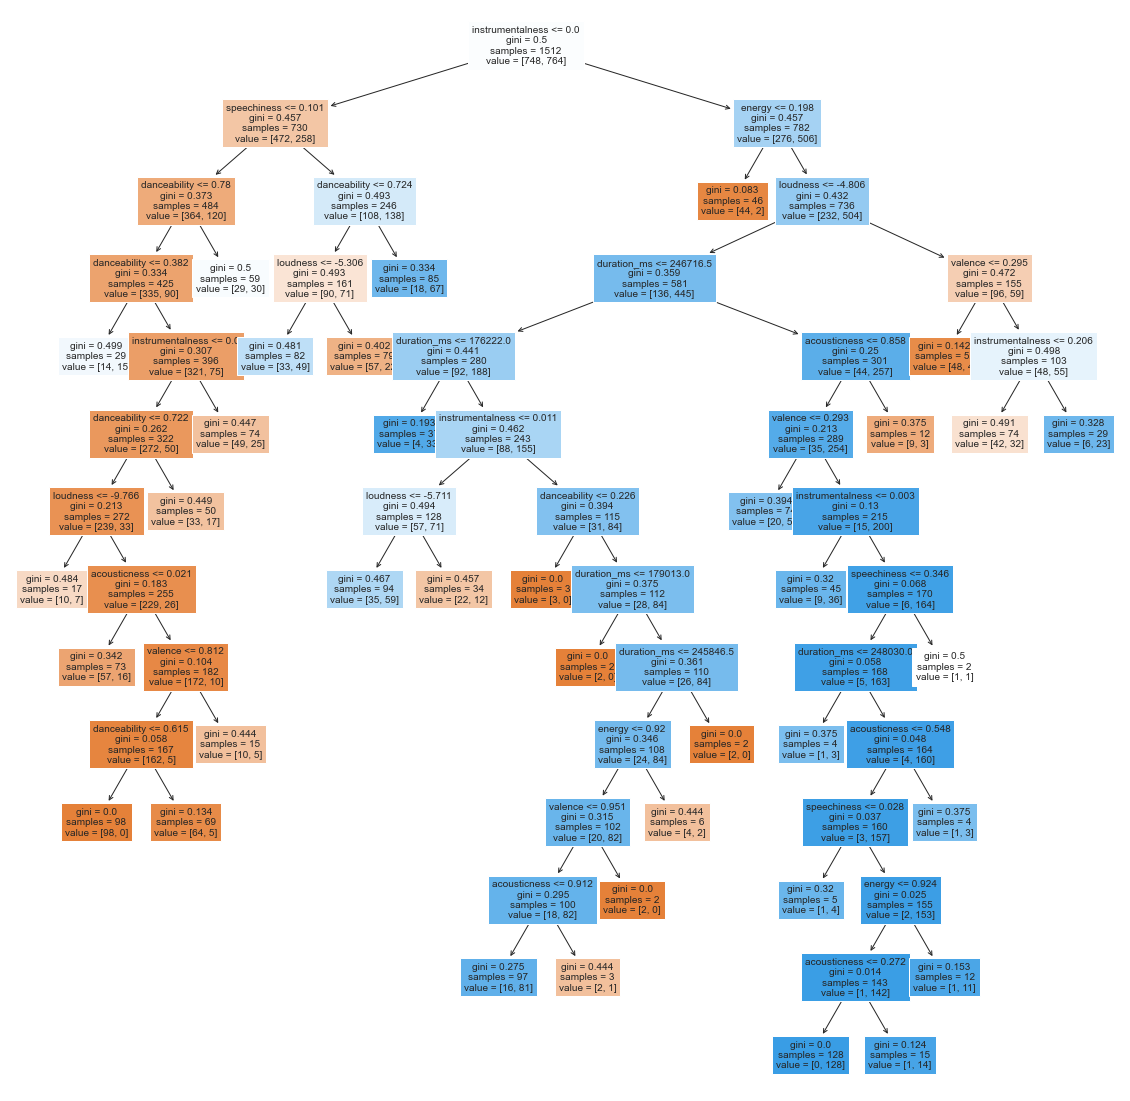

In [37]:
show_tree(dt, features)

In [38]:
y_pred= c.predict(x_test)

In [39]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [40]:
#Calculating Accuracy on the test set (unseen data)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)*100
print(str(round(score,5)) + "%")

73.26733%


In [53]:
y_train

213     1
1301    0
218     1
383     1
1076    0
       ..
1965    0
369     1
119     1
198     1
262     1
Name: target, Length: 1512, dtype: int64

In [43]:
x_test

,danceability,duration_ms,loudness,speechiness,valence,energy,key,acousticness,instrumentalness
722,0.716,205800,-8.904,0.2120,0.915,0.568,2,0.2780,0.000002
81,0.711,221350,-6.248,0.2520,0.403,0.705,10,0.1860,0.000000
1261,0.704,201093,-3.422,0.0443,0.960,0.928,8,0.0458,0.000000
312,0.704,288347,-7.415,0.2430,0.408,0.894,6,0.1180,0.000115
1363,0.697,193605,-5.340,0.0511,0.275,0.692,7,0.2630,0.000000
...,...,...,...,...,...,...,...,...,...
776,0.706,206148,-5.212,0.0351,0.246,0.707,0,0.5480,0.000313
4,0.678,392893,-11.648,0.0694,0.904,0.561,5,0.1800,0.512000
1763,0.652,294867,-7.981,0.0313,0.360,0.473,0,0.2430,0.000000
1733,0.815,283934,-6.698,0.0513,0.681,0.944,1,0.0264,0.000380


In [55]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the decision tree classifier with the best hyperparameters
tree_tuned = DecisionTreeClassifier(**best_params)
dt2=tree_tuned.fit(x_train, y_train)


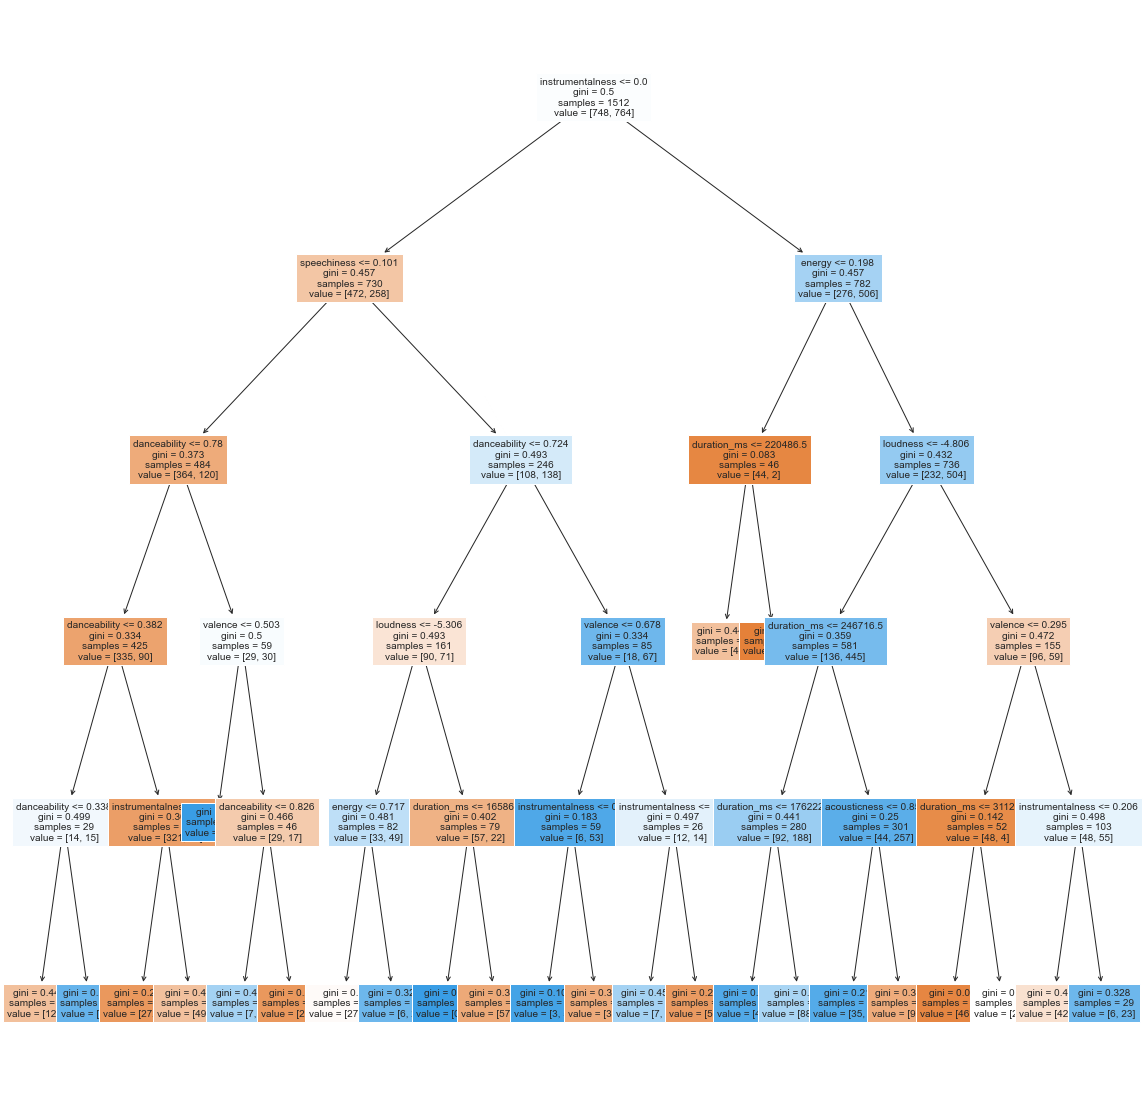

In [56]:
show_tree(dt2, features)

In [57]:
y_pred1= tree_tuned.predict(x_test)
score1 = accuracy_score(y_test, y_pred1)*100
print(str(round(score1,5)) + "%")

73.46535%


In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions for randomized search
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, n_iter=100, cv=5)
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params_random = random_search.best_params_

# Train the decision tree classifier with the best hyperparameters from randomized search
tree_random = DecisionTreeClassifier(**best_params_random)
dt3=tree_random.fit(x_train, y_train)


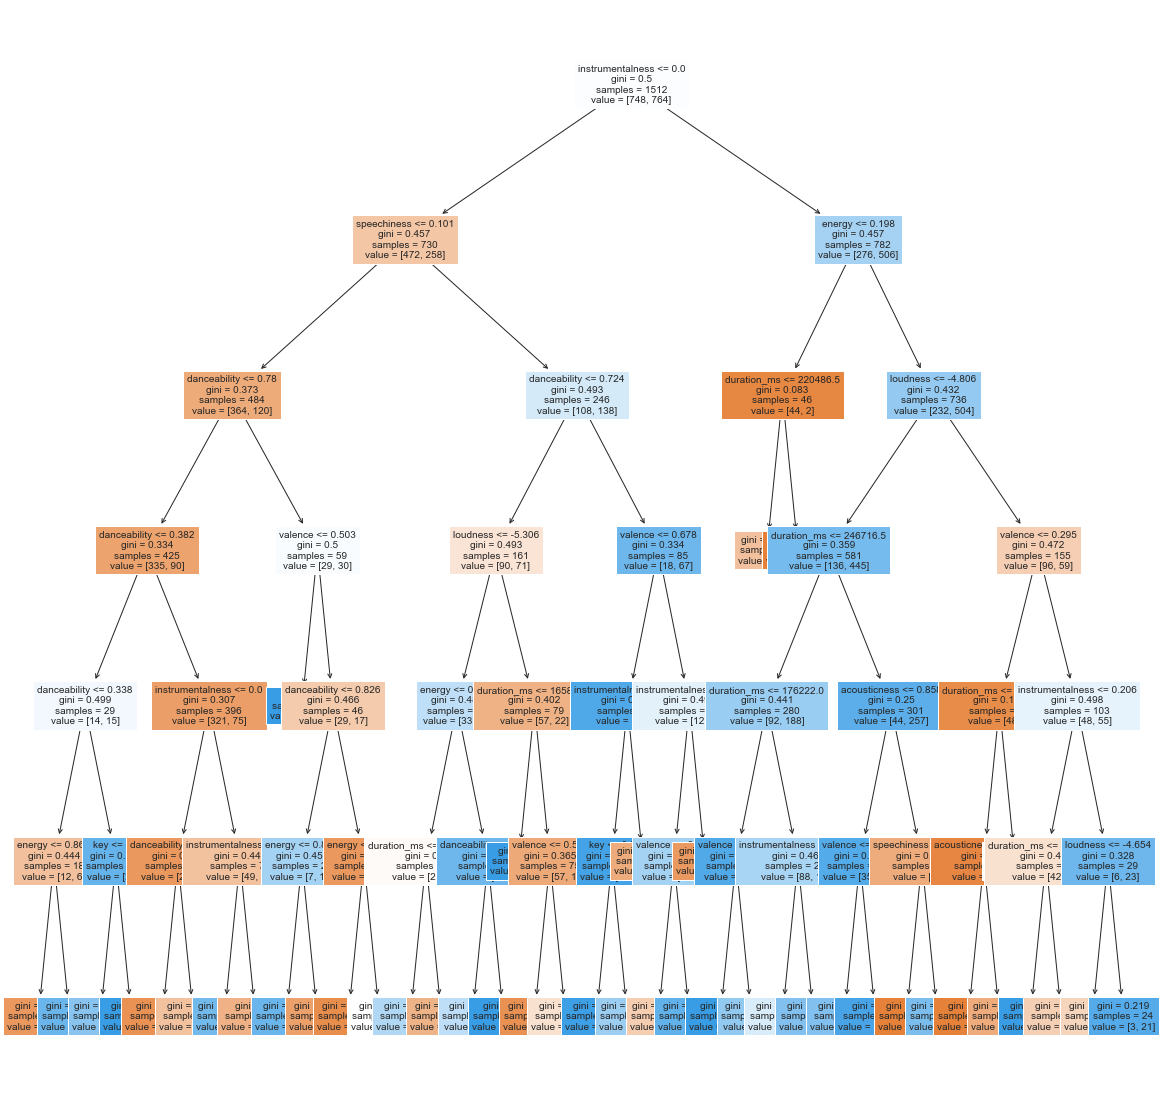

In [59]:
show_tree(dt3, features)

In [60]:
y_pred2= tree_random.predict(x_test)
score2 = accuracy_score(y_test, y_pred2)*100
print(str(round(score2,5)) + "%")

73.86139%


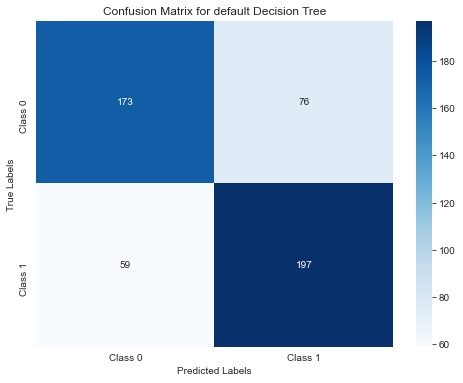

In [65]:
from sklearn.metrics import confusion_matrix

conf_matrix1 = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for default Decision Tree')
plt.show()

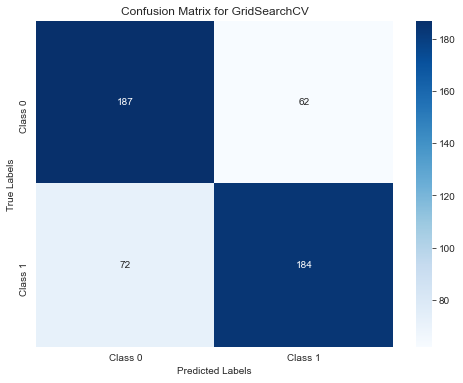

In [66]:
conf_matrix2 = confusion_matrix(y_test, y_pred1)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for GridSearchCV')
plt.show()

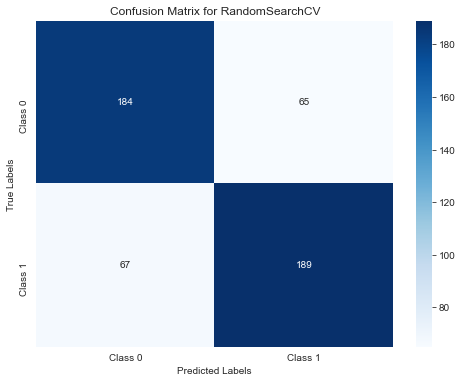

In [67]:
conf_matrix3 = confusion_matrix(y_test, y_pred2)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RandomSearchCV')
plt.show()